# PROJECT: LOAN APPROVAL PREDICTION

#The goal of this project is to develop and evaluate various machine learning models to predict the
loan status of people based on their financial records and key information related to loan
applications. By analyzing and comparing different models, the aim is to identify the most effective
model for predicting whether a loan will be approved or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\loan_approval_dataset.csv")
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [3]:
df.head(10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   
5      13500000          10           319                    6800000   
6      33000000           4           678                   22500000   
7      15000000          20           382                   13200000   
8       2200000          20           782                    1300000   
9       4300000          10           388                    3200000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   
5                   8300000              13700000            5100000   
6                  14800000              29200000            4300000   
7                   5700000              11800000            6000000   
8                    800000               2800000             600000   
9                   1400000               3300000            1600000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected  
5     Rejected  
6     Approved  
7     Rejected  
8     Approved  
9     Rejected

In [4]:
df.tail(10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
4259     4260                  0   Not Graduate            Yes        4500000   
4260     4261                  5       Graduate             No        8800000   
4261     4262                  3       Graduate            Yes        3000000   
4262     4263                  5       Graduate             No        1300000   
4263     4264                  3       Graduate             No        5000000   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
4259      11500000          14           509                   13400000   
4260      29300000          10           560                   16800000   
4261       7500000           6           881                    1400000   
4262       3000000          20           540                    1000000   
4263      12700000          14           865                    4700000   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
4259                   2300000              15400000            5900000   
4260                  13900000              31100000            9900000   
4261                   4500000               6100000            2300000   
4262                   2300000               3200000            1900000   
4263                   8100000              19500000            6300000   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
4259     Rejected  
4260     Approved  
4261     Approved  
4262     Rejected  
4263     Approved  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(4269, 13)

In [10]:
print("Column names:", df.columns)

Column names: Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [11]:
df.columns = df.columns.str.strip()

In [12]:
print("Column names:", df.columns)

Column names: Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [13]:
df["no_of_dependents"].unique()

array([2, 0, 3, 5, 4, 1], dtype=int64)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["encoded_education"]=encoder.fit_transform(df["education"])
df["encoded_self_employed"]=encoder.fit_transform(df["self_employed"])
df["encoded_loan_status"]=encoder.fit_transform(df["loan_status"])
df

loan_id  no_of_dependents      education self_employed  income_annum  \
0           1                 2       Graduate            No       9600000   
1           2                 0   Not Graduate           Yes       4100000   
2           3                 3       Graduate            No       9100000   
3           4                 3       Graduate            No       8200000   
4           5                 5   Not Graduate           Yes       9800000   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes       1000000   
4265     4266                 0   Not Graduate           Yes       3300000   
4266     4267                 2   Not Graduate            No       6500000   
4267     4268                 1   Not Graduate            No       4100000   
4268     4269                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  encoded_education  encoded_self_employed  \
0       Approved                  0                      0   
1       Rejected                  1                      1   
2       Rejected                  0                      0   
3       Rejected                  0                      0   
4       Rejected                  1                      1   
...          ...                ...                    ...   
4264    Rejected                  0                      1   
4265    Approved                  1                      1   
4266    Rejected                  1                      0   
4267    Approved                  1                      0   
4268    Approved                  0                      0   

      encoded_loan_status  
0                       0  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
4264                    1  
4265                    0  
4266                    1  
4267                    0  
4268                    0  

[4269 rows x 16 columns]

In [15]:
df.corr()

loan_id  no_of_dependents  income_annum  \
loan_id                   1.000000          0.005326      0.012592   
no_of_dependents          0.005326          1.000000      0.007266   
income_annum              0.012592          0.007266      1.000000   
loan_amount               0.008170         -0.003366      0.927470   
loan_term                 0.009809         -0.020111      0.011488   
cibil_score               0.016323         -0.009998     -0.023034   
residential_assets_value  0.020936          0.007376      0.636841   
commercial_assets_value   0.018595         -0.001531      0.640328   
luxury_assets_value      -0.000862          0.002817      0.929145   
bank_asset_value          0.010765          0.011163      0.851093   
encoded_education        -0.015536         -0.002697     -0.011625   
encoded_self_employed     0.001745          0.000765      0.002368   
encoded_loan_status      -0.017685          0.018114      0.015189   

                          loan_amount  loan_term  cibil_score  \
loan_id                      0.008170   0.009809     0.016323   
no_of_dependents            -0.003366  -0.020111    -0.009998   
income_annum                 0.927470   0.011488    -0.023034   
loan_amount                  1.000000   0.008437    -0.017035   
loan_term                    0.008437   1.000000     0.007810   
cibil_score                 -0.017035   0.007810     1.000000   
residential_assets_value     0.594596   0.008016    -0.019947   
commercial_assets_value      0.603188  -0.005478    -0.003769   
luxury_assets_value          0.860914   0.012490    -0.028618   
bank_asset_value             0.788122   0.017177    -0.015478   
encoded_education           -0.010631   0.008417     0.004649   
encoded_self_employed        0.001450   0.004107    -0.004866   
encoded_loan_status         -0.016150   0.113036    -0.770518   

                          residential_assets_value  commercial_assets_value  \
loan_id                                   0.020936                 0.018595   
no_of_dependents                          0.007376                -0.001531   
income_annum                              0.636841                 0.640328   
loan_amount                               0.594596                 0.603188   
loan_term                                 0.008016                -0.005478   
cibil_score                              -0.019947                -0.003769   
residential_assets_value                  1.000000                 0.414786   
commercial_assets_value                   0.414786                 1.000000   
luxury_assets_value                       0.590932                 0.591128   
bank_asset_value                          0.527418                 0.548576   
encoded_education                        -0.010930                 0.006763   
encoded_self_employed                     0.006144                -0.017998   
encoded_loan_status                       0.014367                -0.008246   

                          luxury_assets_value  bank_asset_value  \
loan_id                             -0.000862          0.010765   
no_of_dependents                     0.002817          0.011163   
income_annum                         0.929145          0.851093   
loan_amount                          0.860914          0.788122   
loan_term                            0.012490          0.017177   
cibil_score                         -0.028618         -0.015478   
residential_assets_value             0.590932          0.527418   
commercial_assets_value              0.591128          0.548576   
luxury_assets_value                  1.000000          0.788517   
bank_asset_value                     0.788517          1.000000   
encoded_education                   -0.012471         -0.009424   
encoded_self_employed                0.004413         -0.000215   
encoded_loan_status                  0.015465          0.006778   

                          encoded_education  encoded_self_employed  \
loan_id            

# Visualization

In [16]:
df.head()

loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   

   encoded_education  encoded_self_employed  encoded_loan_status  
0                  0                      0                    0  
1                  1                      1                    1  
2                  0                      0                    1  
3                  0                      0                    1  
4                  1                      1                    1

<AxesSubplot:>

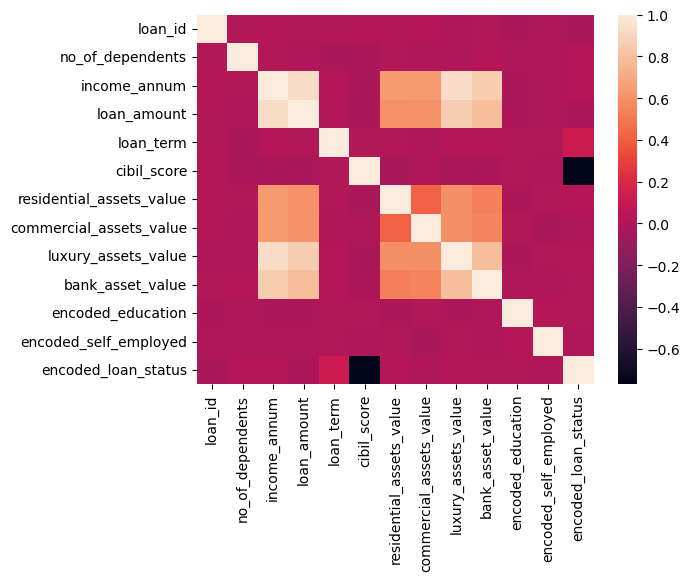

In [17]:
sns.heatmap(df.corr())

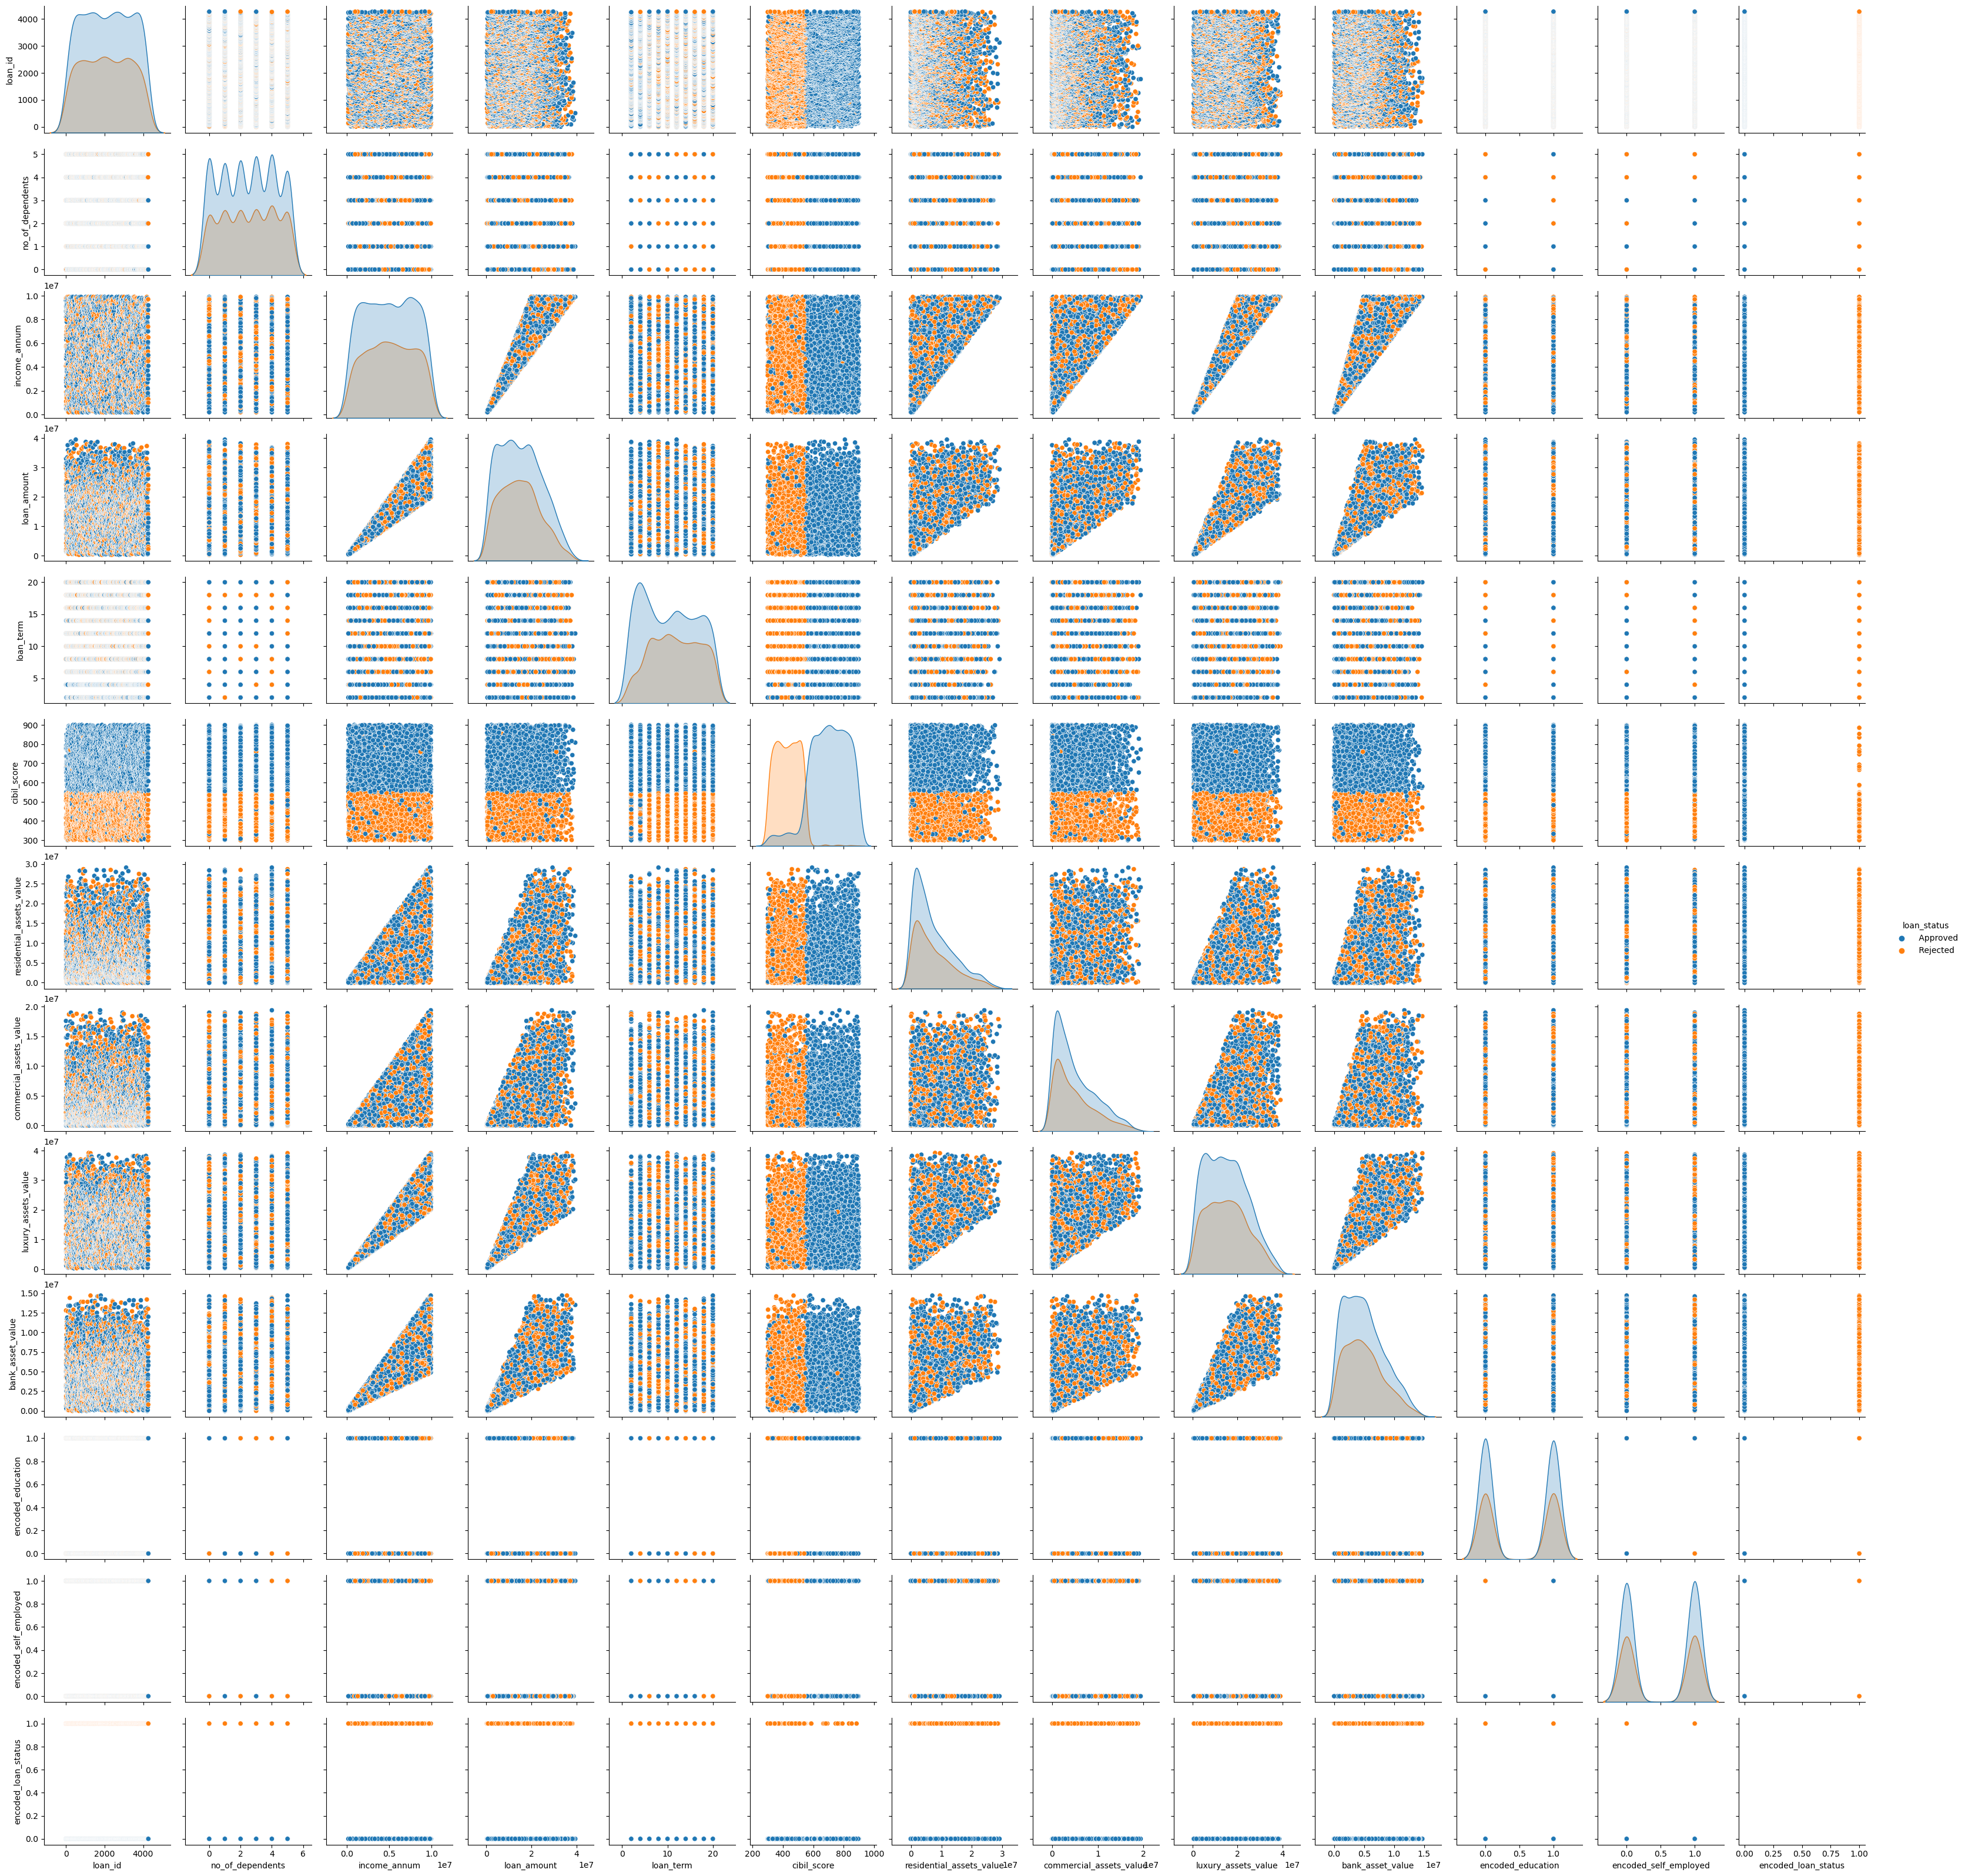

In [18]:
sns.pairplot(df,hue="loan_status")

<AxesSubplot:xlabel='loan_status', ylabel='count'>

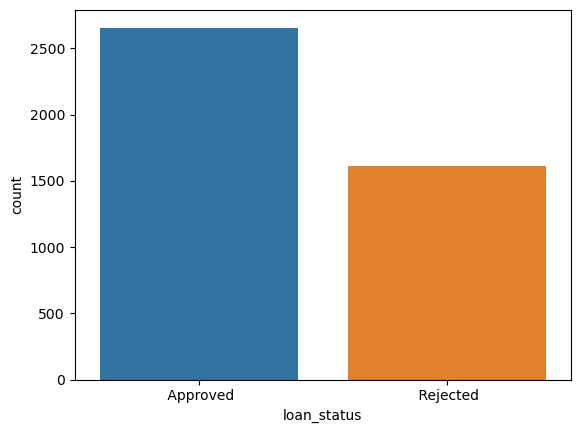

In [19]:
sns.countplot(x="loan_status", data=df)

<AxesSubplot:xlabel='no_of_dependents', ylabel='count'>

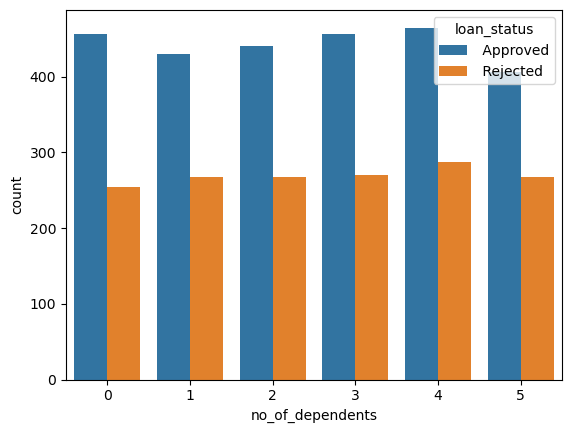

In [20]:
sns.countplot("no_of_dependents",data=df,hue="loan_status")

<AxesSubplot:xlabel='encoded_education', ylabel='count'>

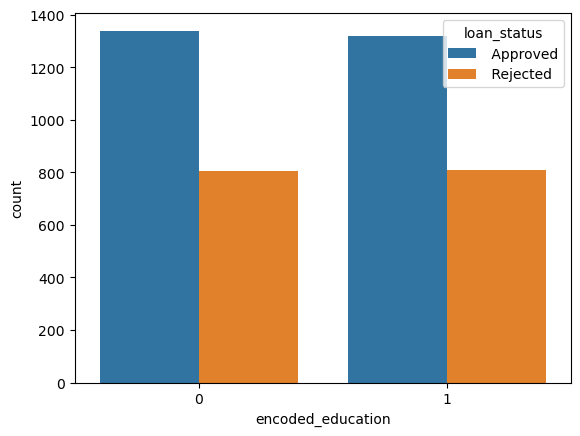

In [21]:
sns.countplot("encoded_education",data=df,hue="loan_status")

<AxesSubplot:xlabel='encoded_self_employed', ylabel='count'>

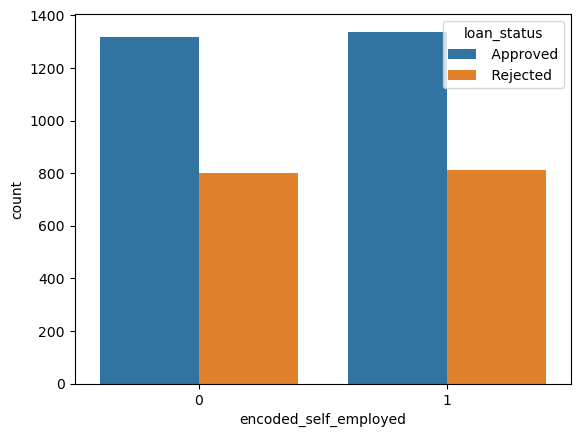

In [22]:
sns.countplot("encoded_self_employed",data=df,hue="loan_status")

<AxesSubplot:xlabel='income_annum', ylabel='Density'>

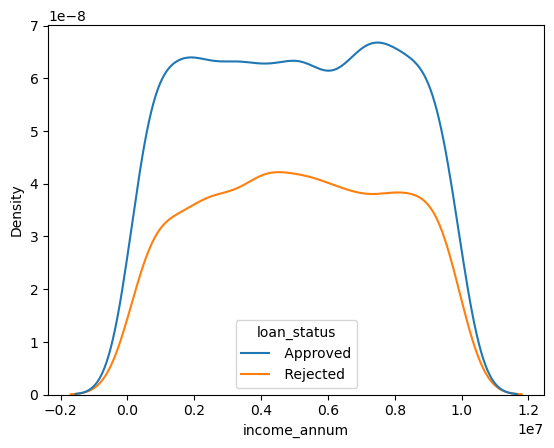

In [23]:
sns.kdeplot("income_annum",data=df,hue="loan_status")

<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

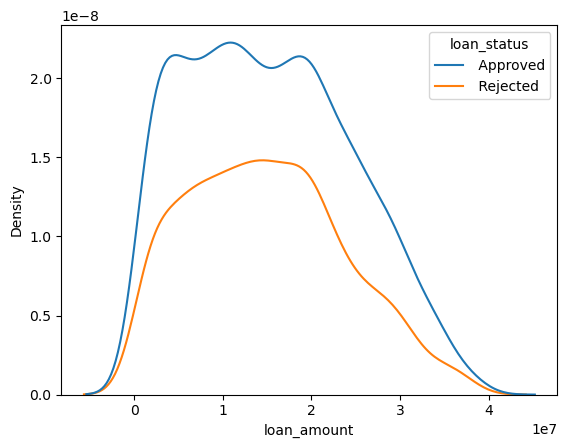

In [24]:
sns.kdeplot(x="loan_amount",hue="loan_status",data=df)

<AxesSubplot:xlabel='loan_term', ylabel='count'>

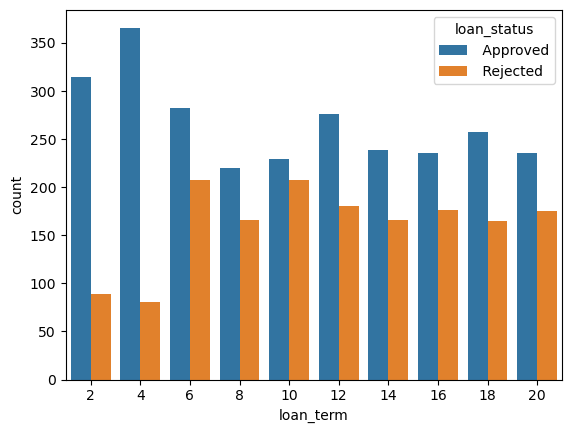

In [25]:
sns.countplot(x="loan_term",hue="loan_status",data=df)

<AxesSubplot:xlabel='cibil_score', ylabel='Count'>

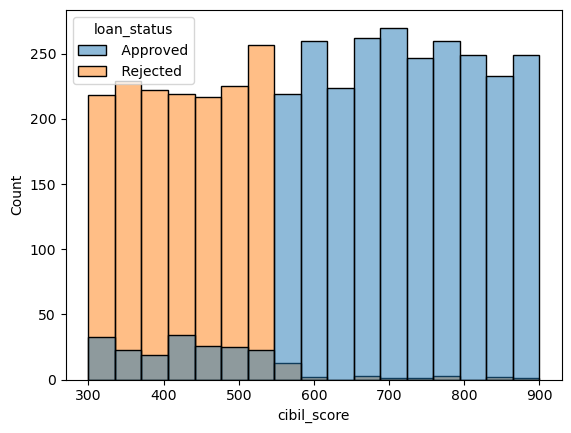

In [26]:
sns.histplot(x="cibil_score", hue="loan_status", data=df)

<AxesSubplot:xlabel='loan_status', ylabel='residential_assets_value'>

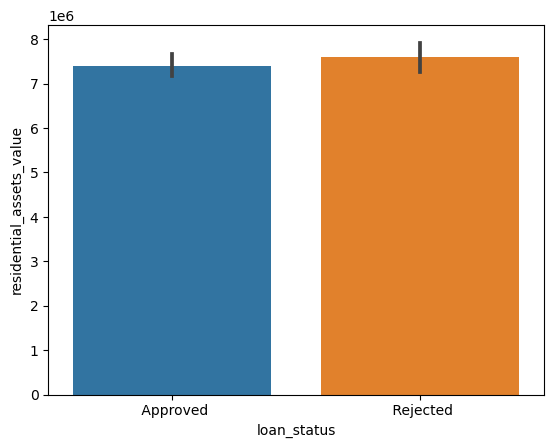

In [38]:
sns.barplot(x="loan_status", y="residential_assets_value", data=df)

<AxesSubplot:xlabel='loan_status', ylabel='commercial_assets_value'>

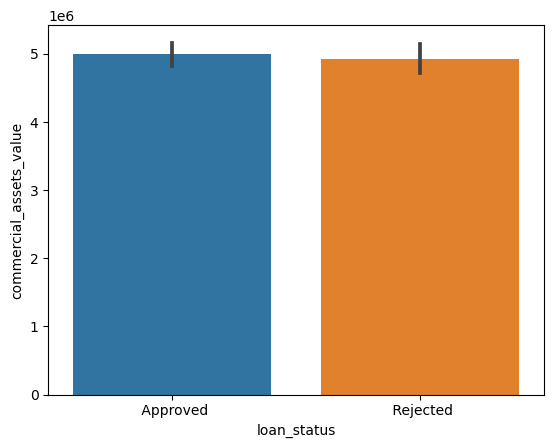

In [37]:
sns.barplot(x="loan_status", y="commercial_assets_value", data=df)

<AxesSubplot:xlabel='loan_status', ylabel='luxury_assets_value'>

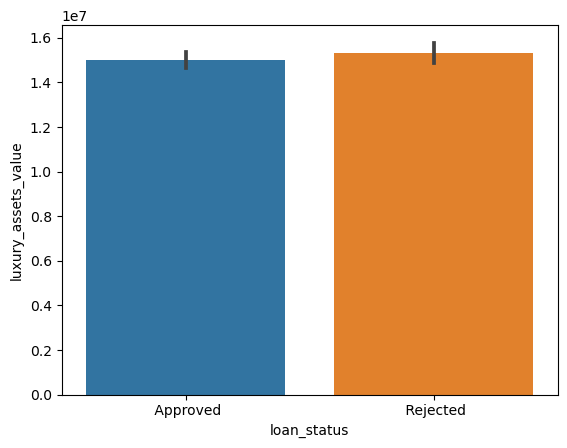

In [36]:
sns.barplot(x="loan_status", y="luxury_assets_value", data=df)

<AxesSubplot:xlabel='loan_status', ylabel='bank_asset_value'>

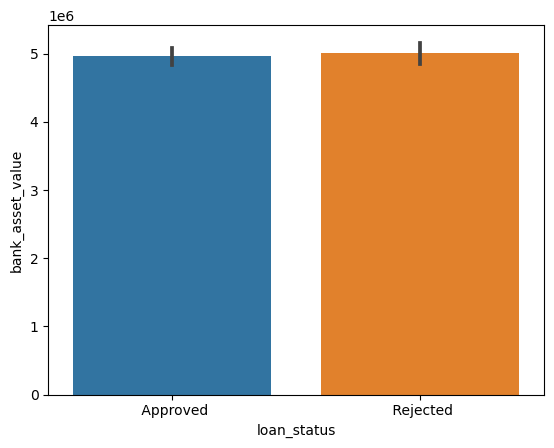

In [39]:
sns.barplot(x="loan_status", y="bank_asset_value", data=df)

## outlier detection

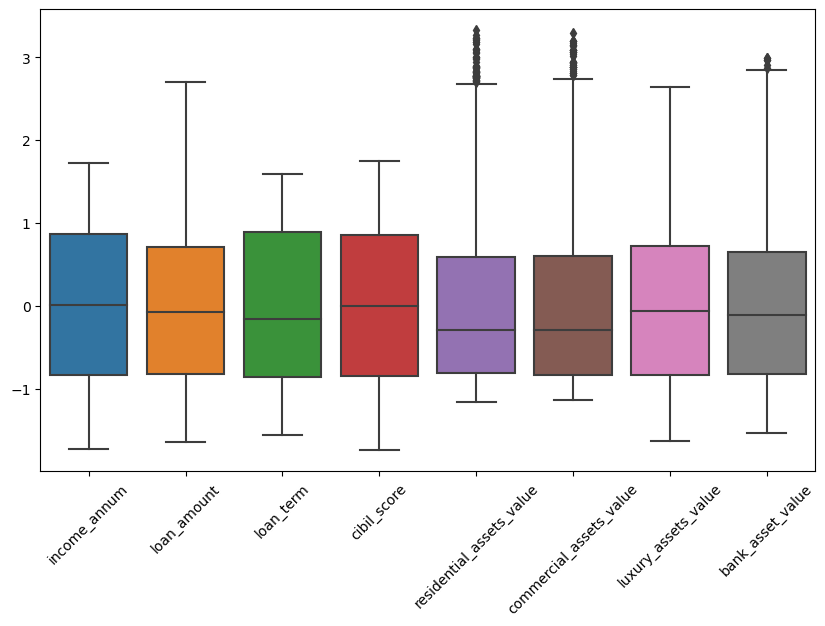

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['income_annum', 'loan_amount', 'loan_term', 'cibil_score', 
                     'residential_assets_value', 'commercial_assets_value', 
                     'luxury_assets_value', 'bank_asset_value']])
plt.xticks(rotation=45)
plt.show()

## Normalization

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns_to_normalize = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
                        'residential_assets_value', 'commercial_assets_value', 
                        'luxury_assets_value', 'bank_asset_value']

# Apply standardization (mean=0, std=1) to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

loan_id  no_of_dependents      education self_employed  income_annum  \
0           1                 2       Graduate            No      1.617979   
1           2                 0   Not Graduate           Yes     -0.341750   
2           3                 3       Graduate            No      1.439822   
3           4                 3       Graduate            No      1.119139   
4           5                 5   Not Graduate           Yes      1.689242   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes     -1.446324   
4265     4266                 0   Not Graduate           Yes     -0.626801   
4266     4267                 2   Not Graduate            No      0.513405   
4267     4268                 1   Not Graduate            No     -0.341750   
4268     4269                 1       Graduate            No      1.475453   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        1.633052   0.192617     1.032792                 -0.780058   
1       -0.324414  -0.508091    -1.061051                 -0.733924   
2        1.610933   1.594031    -0.544840                 -0.057300   
3        1.721525  -0.508091    -0.771045                  1.649637   
4        1.002681   1.594031    -1.264055                  0.757724   
...           ...        ...          ...                       ...   
4264    -1.419268   0.192617    -1.641063                 -0.718546   
4265    -0.423946   1.594031    -0.237434                 -0.503257   
4266     0.969504   1.243677    -0.829046                 -0.964591   
4267    -0.258059  -0.508091     1.044393                  0.111856   
4268     1.610933  -0.157737     0.040972                  1.588126   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    2.877289             0.832028          0.930304   
1                   -0.631921            -0.694993         -0.515936   
2                   -0.107818             1.996520          2.407316   
3                   -0.381263             0.897943          0.899533   
4                    0.735304             1.568075          0.007172   
...                       ...                  ...               ...   
4264                -1.019301            -1.299210         -1.285213   
4265                -0.472412            -0.453306         -0.946732   
4266                 1.692361             0.326683          0.714907   
4267                -0.973727            -0.112748          0.253341   
4268                 1.555638             2.260178          2.161148   

     loan_status  encoded_education  encoded_self_employed  \
0       Approved                  0                      0   
1       Rejected                  1                      1   
2       Rejected                  0                      0   
3       Rejected                  0                      0   
4       Rejected                  1                      1   
...          ...                ...                    ...   
4264    Rejected                  0                      1   
4265    Approved                  1                      1   
4266    Rejected                  1                      0   
4267    Approved                  1                      0   
4268    Approved                  0                      0   

      encoded_loan_status  
0                       0  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
4264                    1  
4265                    0  
4266                    1  
4267                    0  
4268                    0  

[4269 rows x 16 columns]

In [45]:
x = df[["no_of_dependents", "encoded_education", "encoded_self_employed", 
        "income_annum", "loan_amount", "loan_term", "cibil_score", 
        "residential_assets_value", "commercial_assets_value", 
        "luxury_assets_value", "bank_asset_value"]]

y = df["encoded_loan_status"]

print(x)
print(y)

      no_of_dependents  encoded_education  encoded_self_employed  \
0                    2                  0                      0   
1                    0                  1                      1   
2                    3                  0                      0   
3                    3                  0                      0   
4                    5                  1                      1   
...                ...                ...                    ...   
4264                 5                  0                      1   
4265                 0                  1                      1   
4266                 2                  1                      0   
4267                 1                  1                      0   
4268                 1                  0                      0   

      income_annum  loan_amount  loan_term  cibil_score  \
0         1.617979     1.633052   0.192617     1.032792   
1        -0.341750    -0.324414  -0.508091    -1.061051   
2     

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

      no_of_dependents  encoded_education  encoded_self_employed  \
3404                 4                  1                      0   
781                  3                  1                      1   
3002                 4                  0                      1   
4047                 3                  1                      0   
3391                 2                  0                      1   
...                ...                ...                    ...   
3444                 0                  0                      1   
466                  5                  1                      1   
3092                 4                  1                      1   
3772                 2                  1                      1   
860                  4                  0                      0   

      income_annum  loan_amount  loan_term  cibil_score  \
3404     -0.804958    -0.755720   0.542970    -1.269856   
781       1.724873     0.582434  -1.208798     1.537403   
3002  

# LOGISTIC REGRESSION

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 0])

Text(0.5, 1.0, 'Actual vs predict')

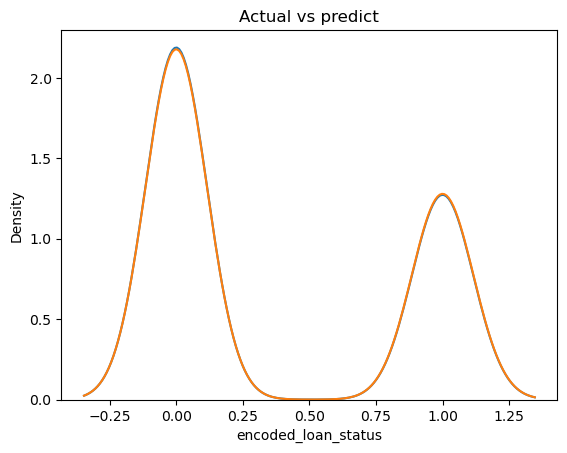

In [86]:
sns.kdeplot(y_test)
sns.kdeplot(y_pred)
plt.title("Actual vs predict")

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       810
           1       0.87      0.87      0.87       471

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281

[[747  63]
 [ 60 411]]
0.9039812646370023 accuracy
0.8698412698412699 f1 score


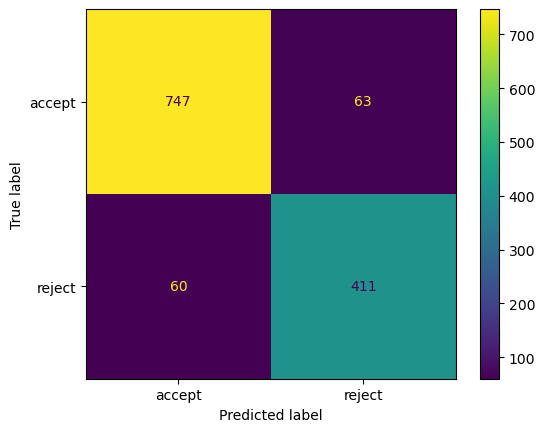

In [87]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
labels=["accept","reject"]
reprt=classification_report(y_test,y_pred)
mat=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(mat,display_labels=labels)
cm.plot()
score=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(reprt)
print(mat)
print(score,"accuracy")
print(f1,"f1 score")

# KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred2=knn.predict(x_test)
y_pred2

array([1, 1, 1, ..., 0, 1, 0])

Text(0.5, 1.0, 'Actual vs predict')

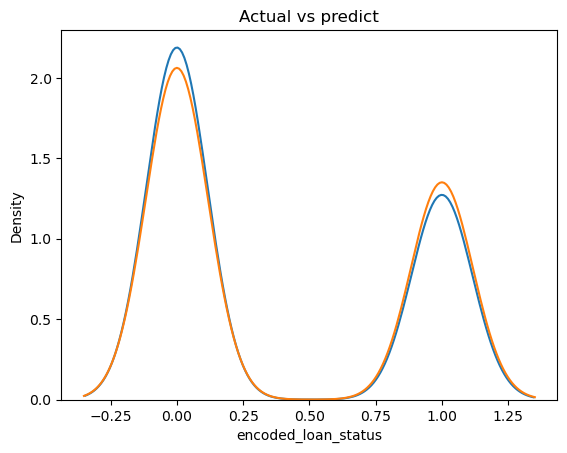

In [89]:
sns.kdeplot(y_test)
sns.kdeplot(y_pred2)
plt.title("Actual vs predict")

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       810
           1       0.83      0.89      0.86       471

    accuracy                           0.89      1281
   macro avg       0.88      0.89      0.88      1281
weighted avg       0.89      0.89      0.89      1281

[[722  88]
 [ 52 419]]
0.8907103825136612 accuracy
0.8568507157464212 f1 score


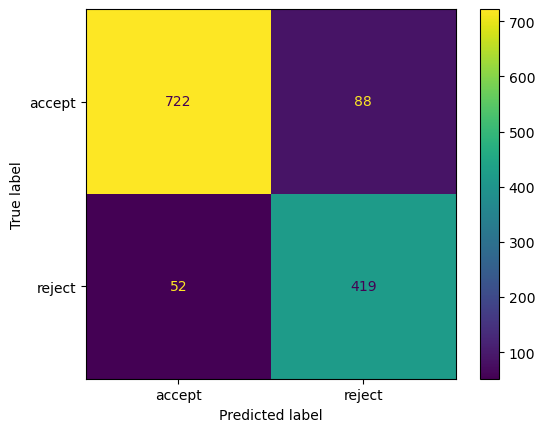

In [90]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
labels=["accept","reject"]
reprt=classification_report(y_test,y_pred2)
mat=confusion_matrix(y_test,y_pred2)
cm=ConfusionMatrixDisplay(mat,display_labels=labels)
cm.plot()
score2=accuracy_score(y_test,y_pred2)
f1_2=f1_score(y_test,y_pred2)
print(reprt)
print(mat)
print(score2,"accuracy")
print(f1_2,"f1 score")

# NAIVE BAYES

In [91]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred3=nb.predict(x_test)
y_pred3

array([1, 0, 1, ..., 0, 1, 0])

Text(0.5, 1.0, 'Actual vs predict')

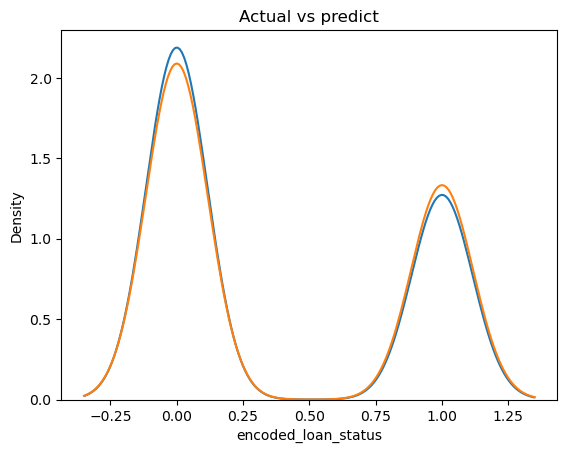

In [92]:
sns.kdeplot(y_test)
sns.kdeplot(y_pred3)
plt.title("Actual vs predict")

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       810
           1       0.89      0.94      0.91       471

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281

[[753  57]
 [ 29 442]]
0.9328649492583919 accuracy
0.911340206185567 f1 score


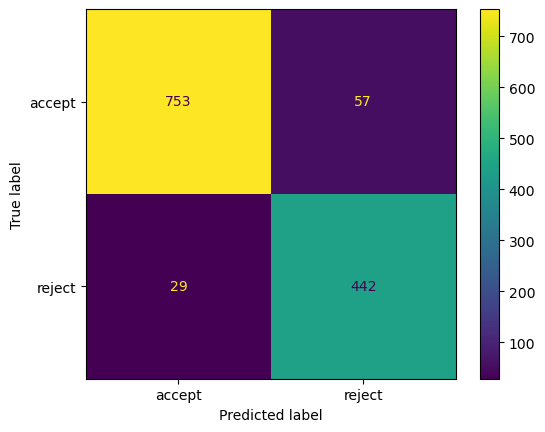

In [98]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
labels=["accept","reject"]
reprt=classification_report(y_test,y_pred3)
mat=confusion_matrix(y_test,y_pred3)
cm=ConfusionMatrixDisplay(mat,display_labels=labels)
cm.plot()
score3=accuracy_score(y_test,y_pred3)
f1_3=f1_score(y_test,y_pred3)
print(reprt)
print(mat)
print(score3,"accuracy")
print(f1_3,"f1 score")

# DECISION TREE

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)
y_pred4=dtree.predict(x_test)
y_pred4

array([1, 0, 1, ..., 0, 1, 0])

Text(0.5, 1.0, 'Actual vs predict')

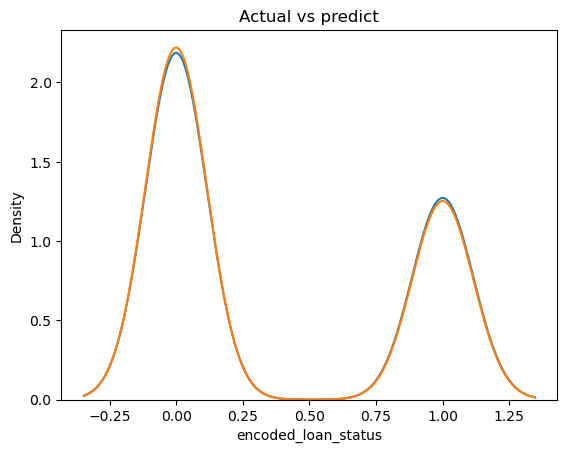

In [95]:
sns.kdeplot(y_test)
sns.kdeplot(y_pred4)
plt.title("Actual vs predict")

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       810
           1       0.87      0.87      0.87       471

    accuracy                           0.90      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281

[[797  13]
 [ 22 449]]
0.9726775956284153 accuracy
0.9624866023579851 f1 score


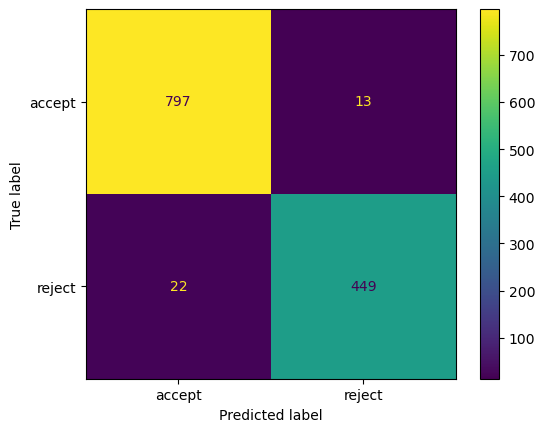

In [97]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
labels=["accept","reject"]
reprt=classification_report(y_test,y_pred)
mat=confusion_matrix(y_test,y_pred4)
cm=ConfusionMatrixDisplay(mat,display_labels=labels)
cm.plot()
score4=accuracy_score(y_test,y_pred4)
f1_4=f1_score(y_test,y_pred4)
print(reprt)
print(mat)
print(score4,"accuracy")
print(f1_4,"f1 score")

In [103]:
f1_data = pd.DataFrame({'Model': ['LOGISTIC REGRESION', 'KNN', 'NAIVE BAYES', 'DECISION TREE'],
                        'F1 Score': [f1,f1_2,f1_3,f1_4],
                        'Accuracy':[score,score2,score3,score4]})

# Display the DataFrame
print(f1_data)

                Model  F1 Score  Accuracy
0  LOGISTIC REGRESION  0.869841  0.903981
1                 KNN  0.856851  0.890710
2         NAIVE BAYES  0.911340  0.932865
3       DECISION TREE  0.962487  0.972678


Text(0.5, 1.0, 'Comparison of F1 Scores for Different Models')

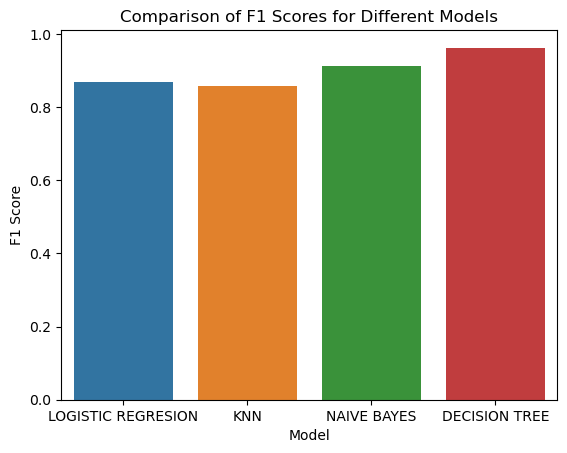

In [107]:
sns.barplot(x='Model', y='F1 Score', data=f1_data)
plt.title('Comparison of F1 Scores for Different Models')

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

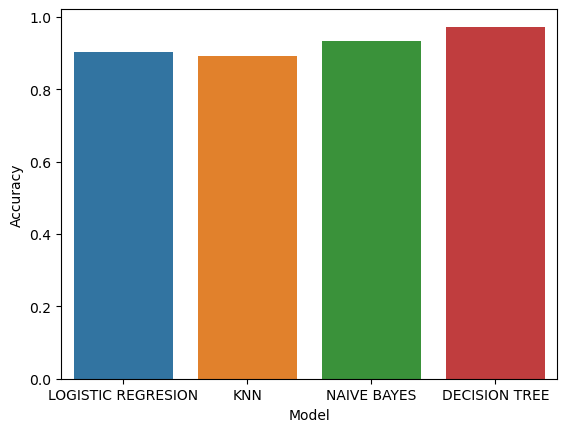

In [108]:
sns.barplot(x='Model', y='Accuracy', data=f1_data)

# DESICION TREE MODEL IS THE BEST MODEL WHICH GIVES THE GOOD F1 SCORE AND ACCURACY